In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop('Unnamed: 32', axis=1) 


In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [8]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# First split: 80% (train+val) and 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Second split: 75% of temp (60% of total) for train, 25% of temp (20% of total) for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


In [11]:
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")


Training set: 341 samples (59.9%)
Validation set: 114 samples (20.0%)
Test set: 114 samples (20.0%)


In [12]:
k_values = range(1, 21)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)
    print(f"K={k}, Validation Accuracy: {val_accuracy:.4f}")

K=1, Validation Accuracy: 0.9561
K=2, Validation Accuracy: 0.9737
K=3, Validation Accuracy: 0.9649
K=4, Validation Accuracy: 0.9737
K=5, Validation Accuracy: 0.9737
K=6, Validation Accuracy: 0.9737
K=7, Validation Accuracy: 0.9737
K=8, Validation Accuracy: 0.9737
K=9, Validation Accuracy: 0.9737
K=10, Validation Accuracy: 0.9737
K=11, Validation Accuracy: 0.9737
K=12, Validation Accuracy: 0.9737
K=13, Validation Accuracy: 0.9737
K=14, Validation Accuracy: 0.9737
K=15, Validation Accuracy: 0.9737
K=16, Validation Accuracy: 0.9737
K=17, Validation Accuracy: 0.9737
K=18, Validation Accuracy: 0.9737
K=19, Validation Accuracy: 0.9737
K=20, Validation Accuracy: 0.9649


In [13]:
# Select best K
best_k = k_values[np.argmax(val_accuracies)]
best_val_accuracy = max(val_accuracies)
print(f"\nBest K: {best_k} with Validation Accuracy: {best_val_accuracy:.4f}")


Best K: 2 with Validation Accuracy: 0.9737


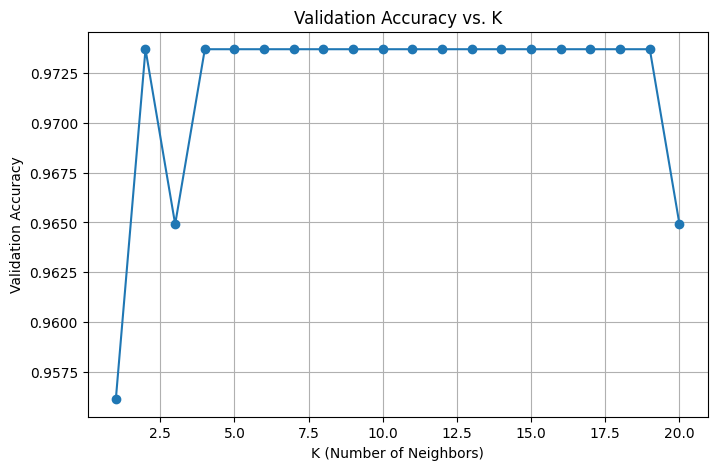

In [14]:
# Plot validation accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. K')
plt.grid(True)
plt.savefig('validation_accuracy_vs_k.png')
plt.show()

In [ ]:
# Cross-Validation
knn_best = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')

In [16]:
print(f"Individual Fold Accuracies:{cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Individual Fold Accuracies:[0.88405797 0.94117647 0.94117647 0.95588235 0.97058824]
Average CV Accuracy: 0.9386
Standard Deviation: 0.0294


In [17]:
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

In [20]:
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.8947
Precision: 0.9688
Recall: 0.7381
F1-Score: 0.8378


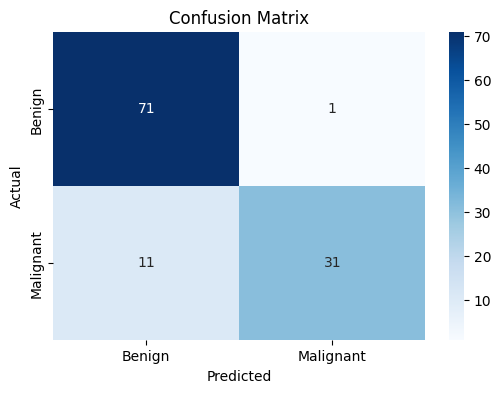

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
#  Overfitting Analysis
train_pred = knn_best.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)


In [23]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Training Accuracy: 0.9677
Validation Accuracy: 0.9737
Test Accuracy: 0.8947
Cross-Validation Accuracy: 0.9386


In [24]:
# Overfitting check
if train_accuracy - test_accuracy > 0.08:
    print("Warning: Potential overfitting detected (training accuracy significantly higher than test).")
else:
    print("No significant overfitting observed.")

No significant overfitting observed.


In [ ]:
# Feature Selection to Reduce Overfitting
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [26]:
# Retrain KNN with best K on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
# Evaluate on test set
y_pred_pca = knn_pca.predict(X_test_pca)
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [28]:
print("\nTest Accuracy with PCA (10 components):", test_accuracy_pca)
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca, target_names=['Benign', 'Malignant']))


Test Accuracy with PCA (10 components): 0.9210526315789473
Classification Report with PCA:
              precision    recall  f1-score   support

      Benign       0.90      0.99      0.94        72
   Malignant       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



In [29]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

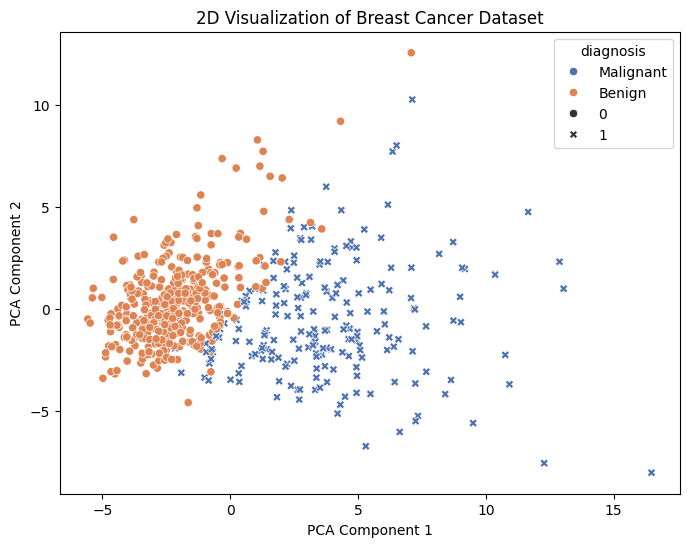

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=pd.Series(y).map({0: 'Benign', 1: 'Malignant'}), 
                style=y, palette='deep')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Breast Cancer Dataset')
plt.show()